In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
ratings = tf.keras.utils.get_file('ratings.csv', 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data')
movies = tf.keras.utils.get_file('movies.csv', 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item')

ratings_data = np.loadtxt(ratings, delimiter='\t')
movies_data = [line.decode('ISO-8859-1').split('|') for line in open(movies, 'rb').readlines()]

num_users = int(max(ratings_data[:, 0]))
num_movies = int(max(ratings_data[:, 1]))

In [3]:
user_item_matrix = np.zeros((num_users, num_movies))
for line in ratings_data:
    user_item_matrix[int(line[0]) - 1][int(line[1]) - 1] = line[2]


In [4]:
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)


In [5]:
visible = Input(shape=(num_movies,))
hidden1 = Dense(512, activation='sigmoid')(visible)
hidden2 = Dense(256, activation='sigmoid')(hidden1)
hidden3 = Dense(128, activation='sigmoid')(hidden2)
visible_reconstructed = Dense(num_movies, activation='sigmoid')(hidden3)

dbm = Model(inputs=visible, outputs=visible_reconstructed)
dbm.compile(optimizer='adam', loss='mean_squared_error')

2024-03-20 21:15:55.879043: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-03-20 21:15:55.879061: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-20 21:15:55.879067: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-20 21:15:55.879095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-20 21:15:55.879110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
history = dbm.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
 1/22 [>.............................] - ETA: 7s - loss: 0.8540

2024-03-20 21:15:56.235592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 14ms/step - loss: 0.8023 - val_loss: 0.6751
Epoch 2/100
18/22 [=======================>......] - ETA: 0s - loss: 0.7417

2024-03-20 21:15:56.621080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 7ms/step - loss: 0.7324 - val_loss: 0.6706
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7302 - val_loss: 0.6702
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7300 - val_loss: 0.6705
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7297 - val_loss: 0.6703
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7298 - val_loss: 0.6702
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7300 - val_loss: 0.6697
Epoch 8/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7296 - val_loss: 0.6700
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7294 - val_loss: 0.6696
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7290 - val_loss: 0.6691
Epoch 11/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7285 - val_loss: 0.6684
Epoch 12/100
22/22 [

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

In [8]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

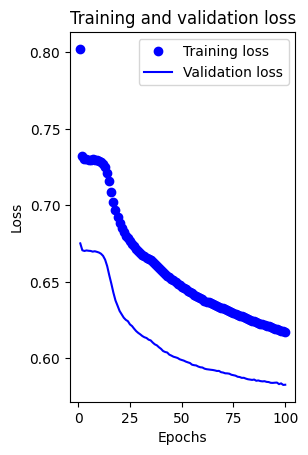

In [9]:
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [10]:
user_id = 1
user_ratings = train_data[user_id - 1]

predicted_ratings = dbm.predict(np.array([user_ratings]))

1/1 [==============================] - 0s 58ms/step


2024-03-20 21:16:08.370906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [11]:
num_recommendations = 5
recommended_movie_indices = np.argsort(predicted_ratings[0])[::-1][:num_recommendations]

In [12]:
print("Recommended movies for User", user_id)
for i, index in enumerate(recommended_movie_indices):
    movie_title = movies_data[index][1]
    print(f"{i + 1}. {movie_title}")

Recommended movies for User 1
1. Scream (1996)
2. Liar Liar (1997)
3. Contact (1997)
4. Air Force One (1997)
5. English Patient, The (1996)
